# Listado inicial archivos

In [2]:
import os

DATA_PATH = './osic-pulmonary-fibrosis-progression'
list(os.listdir(DATA_PATH))

['test-scans-512',
 'osic-pulmonary-fibrosis-progression.zip',
 '.DS_Store',
 'test',
 'train_pre',
 'test.csv',
 'test_pre',
 'train',
 'train.csv',
 '.ipynb_checkpoints',
 'sample_submission.csv']

- train.csv - the training set, contains full history of clinical information
- test.csv - the test set, contains only the baseline measurement
- train/ - contains the training patients' baseline CT scan in DICOM format
- test/ - contains the test patients' baseline CT scan in DICOM format

Ejemplo listado incluido en carpeta train:

In [2]:
list(os.listdir('./osic-pulmonary-fibrosis-progression/train'))[:5]

['ID00296637202279895784347',
 'ID00032637202181710233084',
 'ID00061637202188184085559',
 'ID00232637202260377586117',
 'ID00322637202284842245491']

*El contenido son nuevas carpetas con un identificador de paciente*

Ejemplo listado incluido para cada paciente

In [4]:
list(os.listdir("./osic-pulmonary-fibrosis-progression/train/ID00296637202279895784347"))[:5]

['16.dcm', '17.dcm', '15.dcm', '29.dcm', '28.dcm']

*Tomografía computarizada en formato DICOM*

# train.csv y test.csv
1. Cargamos csv entrenamiento

In [1]:
import pandas as pd

df_train = pd.read_csv('./osic-pulmonary-fibrosis-progression/train.csv')
df_test = pd.read_csv('./osic-pulmonary-fibrosis-progression/test.csv')

In [2]:
df_train.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [3]:
len(df_train)

1549

In [4]:
df_test.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked


- Patient- a unique Id for each patient (also the name of the patient's DICOM folder)
- Weeks- the relative number of weeks pre/post the baseline CT (may be negative)
- FVC - the recorded lung capacity in ml
- Percent- a computed field which approximates the patient's FVC as a percent of the - typical FVC for a person of similar characteristics
- Age
- Sex
- SmokingStatus

Comprobamos los valores disponibles por columna:

In [4]:
unique_values = {'columns': [], 'unique_len': [], 'unique_values': []}
for key in df_train.keys():
    unique_values['columns'].append(key)
    items = df_train[key].unique()
    unique_values['unique_values'].append(items)
    unique_values['unique_len'].append(len(items))

unique_df = pd.DataFrame(data=unique_values)
print('Valores únicos por columna:')
unique_df

Valores únicos por columna:


,columns,unique_len,unique_values
0,Patient,176,"[ID00007637202177411956430, ID0000963720217743..."
1,Weeks,112,"[-4, 5, 7, 9, 11, 17, 29, 41, 57, 8, 13, 15, 2..."
2,FVC,1202,"[2315, 2214, 2061, 2144, 2069, 2101, 2000, 206..."
3,Percent,1536,"[58.2536487166583, 55.7121288374434, 51.862103..."
4,Age,34,"[79, 69, 60, 72, 65, 56, 71, 83, 66, 57, 73, 6..."
5,Sex,2,"[Male, Female]"
6,SmokingStatus,3,"[Ex-smoker, Never smoked, Currently smokes]"


2. Comprobamos total de datos y datos únicos por paciente

In [18]:
print('Len total datos entrenamiento', len(df_train), ' de los cuales únicos ', len(df_train['Patient'].unique()))
print('\nLen total datos pruebas', len(df_test), ' de los cuales únicos ', len(df_test['Patient'].unique()))

Len total datos entrenamiento 1549  de los cuales únicos  176

Len total datos pruebas 5  de los cuales únicos  5


3. Comprobamos datos no nulos

In [20]:
df_train.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

In [21]:
df_test.isnull().sum()

Patient          0
Weeks            0
FVC              0
Percent          0
Age              0
Sex              0
SmokingStatus    0
dtype: int64

4. Resumen datos entrenamiento

In [26]:
df_train.describe()

,Weeks,FVC,Percent,Age
count,1549.000000,1549.000000,1549.000000,1549.000000
mean,31.861846,2690.479019,77.672654,67.188509
std,23.247550,832.770959,19.823261,7.057395
min,-5.000000,827.000000,28.877577,49.000000
25%,12.000000,2109.000000,62.832700,63.000000
50%,28.000000,2641.000000,75.676937,68.000000
75%,47.000000,3171.000000,88.621065,72.000000
max,133.000000,6399.000000,153.145378,88.000000


In [6]:
df_test.describe()

,Weeks,FVC,Percent,Age
count,5.000000,5.000000,5.000000,5.000000
mean,8.800000,2781.600000,75.997702,71.800000
std,7.049823,516.475846,4.970960,2.167948
min,0.000000,1930.000000,70.186855,68.000000
25%,6.000000,2739.000000,71.824968,72.000000
50%,6.000000,2925.000000,76.672493,73.000000
75%,15.000000,3020.000000,79.258903,73.000000
max,17.000000,3294.000000,82.045291,73.000000


## Factores riesgo train csv: Edad, Sexo, Estado de fumador

### edad

In [6]:
unique_patients = df_train.drop_duplicates(subset=['Patient'], keep='last')

In [7]:
print('Descripción datos por edad')
pd.DataFrame(data=unique_patients['Age'].describe())

Descripción datos por edad


,Age
count,176.000000
mean,67.261364
std,7.088009
min,49.000000
25%,63.000000
50%,68.000000
75%,72.000000
max,88.000000


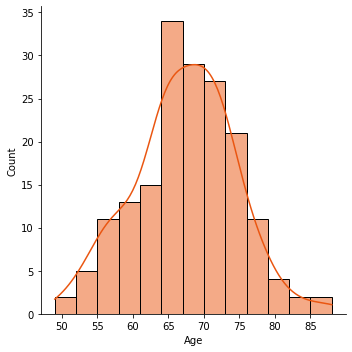

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(data=unique_patients, x="Age", color="#ea5611", kde=True)



### sexo

In [15]:
unique_patients = df_train.drop_duplicates(subset=['Patient'], keep='last')

print('Total pacientes por género')
unique_patients['Sex'].value_counts()

Total pacientes por género


Male      139
Female     37
Name: Sex, dtype: int64

In [19]:
unique_patients['Sex'].value_counts()['Male'] / len(df_train['Patient'].unique()) * 100

78.97727272727273

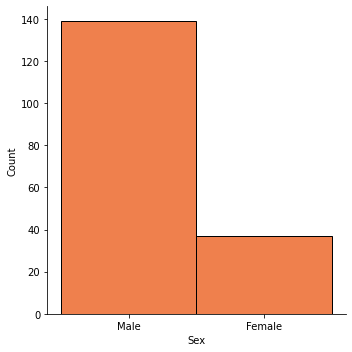

In [20]:
sns.displot(data=unique_patients, x="Sex", color="#ea5611")


### tabaquismo

In [21]:
print('Total pacientes por estado fumador')
unique_patients['SmokingStatus'].value_counts()

Total pacientes por estado fumador


Ex-smoker           118
Never smoked         49
Currently smokes      9
Name: SmokingStatus, dtype: int64

In [24]:
(unique_patients['SmokingStatus'].value_counts()['Ex-smoker'] + unique_patients['SmokingStatus'].value_counts()['Currently smokes']) / len(df_train['Patient'].unique()) * 100

72.1590909090909

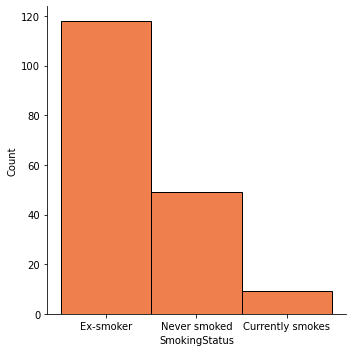

In [22]:
sns.displot(data=unique_patients, x="SmokingStatus", color="#ea5611")

### otros

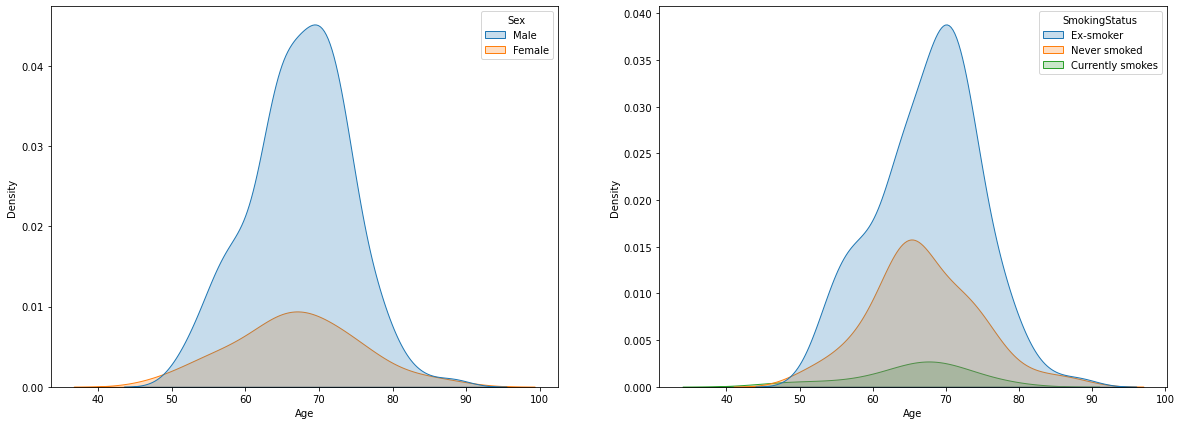

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 7))
sns.kdeplot(data=unique_patients, x='Age', hue='Sex', shade=True, ax=axs[0]);
sns.kdeplot(data=unique_patients, x='Age', hue='SmokingStatus', shade=True, ax=axs[1]);

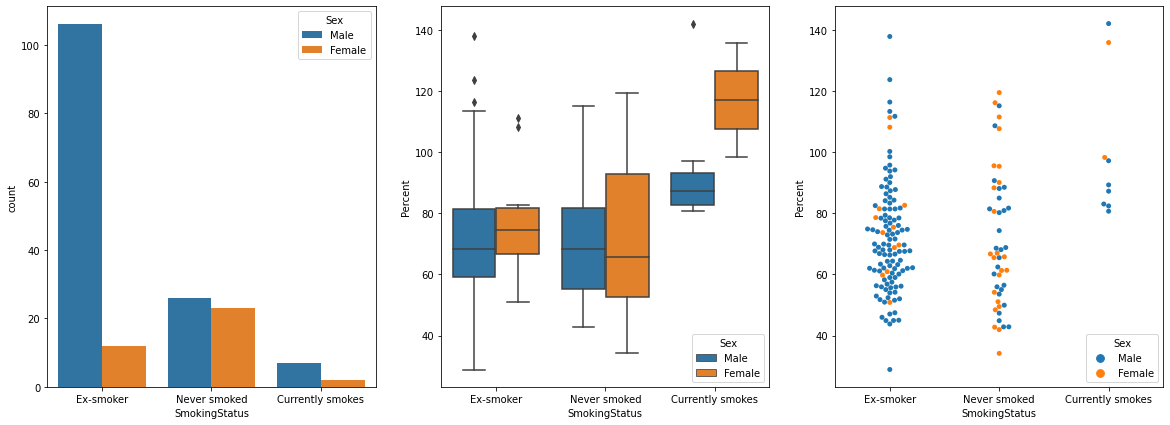

In [29]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 7))
sns.countplot(x="SmokingStatus", hue="Sex", data=unique_patients, ax=axs[0]);
sns.boxplot(x="SmokingStatus", y="Percent", hue="Sex", data=unique_patients, ax=axs[1]);
sns.swarmplot(x="SmokingStatus", y="Percent", hue="Sex", data=unique_patients, ax=axs[2]);